# Regresion Logistica - Social Network Ads
## Algoritmo
- Sirve para clasificar, normalmente en binario
- Es supervisado (por etiquetas)

In [3]:
import pandas as pd

df_ads = pd.read_csv("datasets/Social_Network_Ads.csv")
df_ads.sample(5)

,Age,EstimatedSalary,Purchased
309,38,50000,0
120,36,75000,0
156,46,59000,0
8,25,33000,0
250,44,39000,0


In [5]:
columns = ["Age", "EstimatedSalary"]
df_ads[columns].describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [6]:
df_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [8]:
df_ads.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

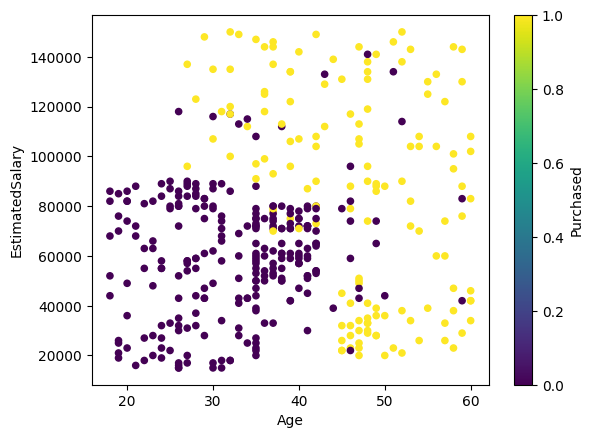

In [9]:
df_ads.plot(x="Age", y="EstimatedSalary", kind="scatter", c="Purchased", colormap="viridis")  # colormap es la escala de colores

<Axes: >

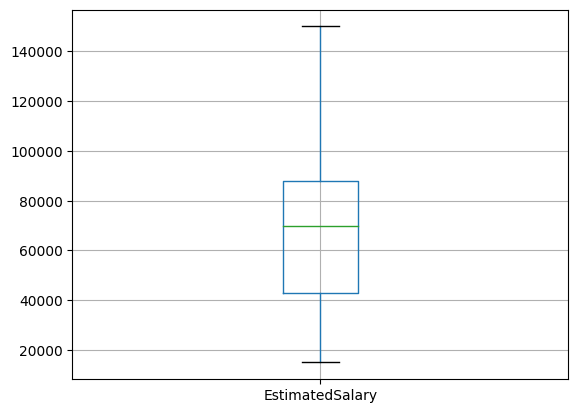

In [14]:
#df_ads.boxplot()
df_ads.boxplot(column="EstimatedSalary")  # Grafica de cajas y bigotes (muestra cuartiles, mediana, valores minimos y maximos)
#  puede mostrar valores atipicos (que modifican los datos por ser muy extremos) que deben ser borrados

In [31]:
from sklearn import model_selection

var_ind = df_ads[["Age", "EstimatedSalary"]]
var_dep = df_ads.Purchased
# Esta funcion regresa 4 listas de los valores independientes (x) usados para pruebas y para entrenamiento, y de los valores dependientes (y)
x_train, x_test, y_train, y_test = model_selection.train_test_split(var_ind, var_dep, test_size=0.3, random_state=7)  # random_state es la semilla de los numeros aleatorios dentro del algoritmo

### Entrenar el modelo

In [32]:
from sklearn.linear_model import LogisticRegression

classificator = LogisticRegression()
classificator.fit(x_train, y_train)
y_pred = classificator.predict(x_test)

print(y_pred[0:10])
print(y_test[0:10])

[1 0 0 0 1 1 1 0 1 0]
265    1
65     0
120    0
132    0
378    1
26     1
287    1
111    0
280    1
164    0
Name: Purchased, dtype: int64


### Evaluar el modelo

In [38]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, recall_score, precision_score, confusion_matrix

print(confusion_matrix(y_test, y_pred, labels=[1, 0]))
print("F1 score", f1_score(y_test, y_pred))
print("Accuracy score",accuracy_score(y_test, y_pred))
print("Recall Score", recall_score(y_test, y_pred))
print("Precision Score", precision_score(y_test, y_pred))
print(classification_report(y_test, y_pred))  # Crea un reporte de los puntos anteriores

[[33  4]
 [11 72]]
F1 score 0.8148148148148148
Accuracy score 0.875
Recall Score 0.8918918918918919
Precision Score 0.75
              precision    recall  f1-score   support

           0       0.95      0.87      0.91        83
           1       0.75      0.89      0.81        37

    accuracy                           0.88       120
   macro avg       0.85      0.88      0.86       120
weighted avg       0.89      0.88      0.88       120

